In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MacOS - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Graph Style
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [77]:
doc_1 = "What a tasty cake!"
doc_2 = "It's a cake! chocolate cake!"
doc_3 = "The Cake Movie."

In [3]:
from gensim.utils import simple_preprocess

In [10]:
doc_1_words = simple_preprocess(doc_1.lower(), min_len=2)
doc_2_words = simple_preprocess(doc_2.lower(), min_len=2)
doc_3_words = simple_preprocess(doc_3.lower(), min_len=2)

print(doc_1_words)
print(doc_2_words)
print(doc_3_words)

['what', 'tasty', 'cake']
['it', 'cake', 'tasty', 'cake']
['the', 'cake', 'movie']


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
vectorizer = CountVectorizer(stop_words='english')
docs = [doc_1, doc_2, doc_3]
matrix = vectorizer.fit_transform(docs)

In [79]:
matrix.todense()

matrix([[1, 0, 0, 1],
        [2, 1, 0, 0],
        [1, 0, 1, 0]])

In [80]:
vectorizer.get_feature_names()

['cake', 'chocolate', 'movie', 'tasty']

In [81]:
df_words = pd.DataFrame(
    data=matrix.todense(), 
    index=['doc_1','doc_2','doc_3'],
    columns=vectorizer.get_feature_names())

df_words

,cake,chocolate,movie,tasty
doc_1,1,0,0,1
doc_2,2,1,0,0
doc_3,1,0,1,0


In [104]:
doc_dict = {
    'doc_1':doc_1,
    'doc_2':doc_2,
    'doc_3':doc_3,
}

In [106]:
print('doc_1: ',doc_dict['doc_1'])
print('doc_2: ',doc_dict['doc_2'])
print('doc_3: ',doc_dict['doc_3'])

doc_1:  What a tasty cake!
doc_2:  It's a cake! chocolate cake!
doc_3:  The Cake Movie.


Text(0.5, 0, 'tasty')

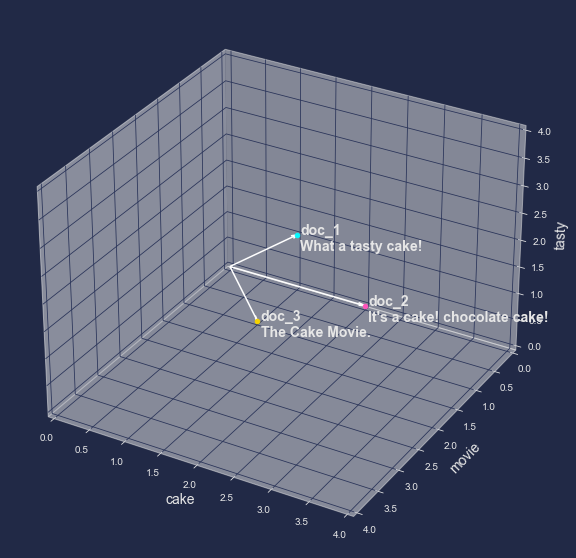

In [116]:
x_label = 'cake'
y_label = 'movie'
z_label = 'tasty'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

for i, df_word in df_words.iterrows():
    x = df_word[x_label]
    y = df_word[y_label]
    z = df_word[z_label]
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,x,y,z,
              arrow_length_ratio=0.1/vec_len)
    ax.text((x+0.05),y,(z-0.3), 
            s=f'{i}\n{doc_dict[i]}',
            size=14,
            fontweight='bold')
    ax.scatter(x,y,z)
              
        
ax.set_xlim(0,4)
ax.set_ylim(4,0)
ax.set_zlim(0,4)


ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_zlabel(z_label, fontsize=14)
